<a href="https://colab.research.google.com/github/Rupesh-Kataria/Real-time-detection-of-facial-emotion-age-and-gender/blob/main/Age_Gender_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': File exists


In [3]:
%cd /mydrive/Age_Gender_Detection

/content/gdrive/My Drive/Age_Gender_Detection


In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

In [5]:
path = "UTKFace1/UTKFace"
images = []
age = []
gender = []
i=0
for img in os.listdir(path):
  i=i+1
  if i%3==0:
    ages = img.split("_")[0]
    genders = img.split("_")[1]
    img = cv2.imread(str(path)+"/"+str(img))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    images.append(np.array(img))
    age.append(np.array(ages))
    gender.append(np.array(genders))

In [6]:
age = np.array(age,dtype=np.int64)
images = np.array(images)/255
gender = np.array(gender,np.uint64)

In [7]:
images.shape

(4458, 200, 200, 3)

In [7]:
x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(images, age, random_state=42)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(images, gender, random_state=42)

In [8]:
age_model = Sequential()
age_model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(200,200,3)))
#age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
#age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
#age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
#age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Flatten())
age_model.add(Dropout(0.2))
age_model.add(Dense(512, activation='relu'))

age_model.add(Dense(1, activation='linear', name='age'))

age_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print(age_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 256)      0

In [10]:
history_age = age_model.fit(x_train_age, y_train_age,
                        validation_data=(x_test_age, y_test_age), epochs=20)

age_model.save('age_model_20epochs.h5')

Epoch 1/20
105/105 [==============================] - 169s 2s/step - loss: 439.4177 - mae: 11.2810 - val_loss: 54.7906 - val_mae: 6.2202
Epoch 2/20
105/105 [==============================] - 166s 2s/step - loss: 45.9329 - mae: 5.4879 - val_loss: 40.4461 - val_mae: 5.1669
Epoch 3/20
105/105 [==============================] - 170s 2s/step - loss: 39.0865 - mae: 5.1234 - val_loss: 42.4933 - val_mae: 5.0161
Epoch 4/20
105/105 [==============================] - 166s 2s/step - loss: 37.0212 - mae: 5.0178 - val_loss: 41.0447 - val_mae: 5.5499
Epoch 5/20
105/105 [==============================] - 166s 2s/step - loss: 37.0604 - mae: 4.9979 - val_loss: 38.5863 - val_mae: 4.8119
Epoch 6/20
105/105 [==============================] - 166s 2s/step - loss: 34.6146 - mae: 4.8001 - val_loss: 36.2140 - val_mae: 4.7434
Epoch 7/20
105/105 [==============================] - 166s 2s/step - loss: 34.0188 - mae: 4.7567 - val_loss: 35.1478 - val_mae: 4.6887
Epoch 8/20
105/105 [==============================] -

In [10]:
gender_model = Sequential()

gender_model.add(Conv2D(36, kernel_size=3, activation='relu', input_shape=(200,200,3)))

gender_model.add(MaxPool2D(pool_size=3, strides=2))
gender_model.add(Conv2D(64, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(128, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(256, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Conv2D(512, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(pool_size=3, strides=2))

gender_model.add(Flatten())
gender_model.add(Dropout(0.2))
gender_model.add(Dense(512, activation='relu'))
gender_model.add(Dense(1, activation='sigmoid', name='gender'))

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_gender = gender_model.fit(x_train_gender, y_train_gender,
                        validation_data=(x_test_gender, y_test_gender), epochs=20)

gender_model.save('gender_model_20epochs.h5')

Epoch 1/20
105/105 [==============================] - 56s 518ms/step - loss: 0.6785 - accuracy: 0.5648 - val_loss: 0.6285 - val_accuracy: 0.6879
Epoch 2/20
105/105 [==============================] - 54s 516ms/step - loss: 0.5692 - accuracy: 0.7302 - val_loss: 0.5001 - val_accuracy: 0.7561
Epoch 3/20
105/105 [==============================] - 57s 543ms/step - loss: 0.4411 - accuracy: 0.8089 - val_loss: 0.3321 - val_accuracy: 0.8610
Epoch 4/20
105/105 [==============================] - 53s 507ms/step - loss: 0.3723 - accuracy: 0.8439 - val_loss: 0.2809 - val_accuracy: 0.8933
Epoch 5/20
105/105 [==============================] - 53s 507ms/step - loss: 0.3197 - accuracy: 0.8666 - val_loss: 0.3407 - val_accuracy: 0.8664
Epoch 6/20
105/105 [==============================] - 53s 509ms/step - loss: 0.2739 - accuracy: 0.8959 - val_loss: 0.2631 - val_accuracy: 0.9076
Epoch 7/20
105/105 [==============================] - 54s 510ms/step - loss: 0.2568 - accuracy: 0.9001 - val_loss: 0.2618 - val_ac

35/35 [==============================] - 3s 79ms/step
Accuracy =  0.9309417040358744


<Axes: >

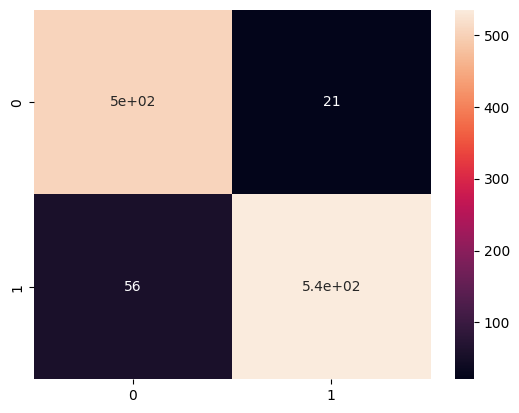

In [13]:
from keras.models import load_model
Test the model
my_model = load_model('gender_model_20epochs.h5', compile=False)


predictions = my_model.predict(x_test_gender)
y_pred = (predictions>= 0.5).astype(int)[:,0]

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test_gender, y_pred))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test_gender, y_pred)
sns.heatmap(cm, annot=True)
